In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

events = pd.read_csv('datos/events.csv.gzip', compression = 'gzip')
events.head()

/home/manu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,"590,870,303,409,729,792.00",nan,"5,990,116,681,709,080,576.00",...,NaN,nan,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,"224,815,696,425,431,552.00","5,516,623,012,570,945,536.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,7858558567428669000,"407,706,219,895,259,712.00"
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,"590,870,303,409,729,792.00",nan,"5,990,116,681,709,080,576.00",...,NaN,nan,1cd98205-0d97-4ec2-a019-667997dbfe7a,"224,815,696,425,431,552.00","997,766,018,131,693,568.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,7858558567428669000,"407,706,219,895,259,712.00"
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,"590,870,303,409,729,792.00",nan,"5,990,116,681,709,080,576.00",...,NaN,nan,f02e2924-21ae-492b-b625-9021ae0a4eca,"224,815,696,425,431,552.00","5,516,623,012,570,945,536.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,7858558567428669000,"407,706,219,895,259,712.00"
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,"590,870,303,409,729,792.00",nan,"5,990,116,681,709,080,576.00",...,NaN,nan,a813cf45-a36e-4668-85e2-5395f1564e98,"224,815,696,425,431,552.00","8,561,152,834,701,073,408.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,6324037615828123965,"407,706,219,895,259,712.00"
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,"7,391,843,585,977,942,016.00",nan,"5,960,895,846,746,644,480.00",...,NaN,nan,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,"224,815,696,425,431,552.00","873,190,165,761,955,328.00","7,531,669,329,342,817,280.00",NaN,Cable/DSL,2894495631302821483,"3,301,377,775,977,699,840.00"


In [20]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

In [21]:
events['event_id'].value_counts().count()

568

568 != 2494423 (len(eventos)) Esto me dice que el event_id es el "tipo" de evento. Pueden suceder en distintas ocasiones. Pero cada vez que genero un evento no genero un id nuevo.

Algo similar sucede con application_id

In [22]:
events['event_uuid'].value_counts().count()

2489324

Pareciera que event_uuid es unico para cada evento generado... Pero hay algunos que no tienen valor. Por que?

In [23]:
events['event_uuid'].isnull().sum().sum()

5099

In [24]:
cantidad_eventos_atribuidos_a_Jampp = events['attributed'].sum()
cantidad_eventos_atribuidos_a_Jampp

5099

Es la misma cantidad!! De eventos con id Nulls y los que fueron atribuidos a Jampp

In [25]:
cantidad_eventos_atribuidos_a_Jampp = float(events['attributed'].sum())
total_eventos = len(events['attributed'])
(cantidad_eventos_atribuidos_a_Jampp) / (total_eventos) * 100

0.20441601123786943

~ 0.2% es el porcentaje de eventos atribuidos a Jampp

In [26]:
df = events[['attributed','event_uuid']]
es_atribuido = df['attributed'] == True

In [27]:
df_filtrado = df[es_atribuido]

In [28]:
df.head()

,attributed,event_uuid
0,False,a9c0b263-acb2-4577-92c5-cbde5d7a5db1
1,False,1cd98205-0d97-4ec2-a019-667997dbfe7a
2,False,f02e2924-21ae-492b-b625-9021ae0a4eca
3,False,a813cf45-a36e-4668-85e2-5395f1564e98
4,False,63a4f0aa-e147-469f-8c55-4ca4f8d0e310


In [29]:
df_filtrado.head()

,attributed,event_uuid
11150,True,NaN
11151,True,NaN
11152,True,NaN
31408,True,NaN
31482,True,NaN


In [30]:
df_filtrado['event_uuid'].isnull().sum().sum()

5099

In [31]:
len(df_filtrado)

5099

Evidentemente todos los eventos que son atribuidos a Jampp no tienen ningun uuid

In [32]:
events['date'] = pd.to_datetime(events['date'])

In [33]:
events['year'] = events['date'].dt.year

In [34]:
events['year'].value_counts()

2019    2494423
Name: year, dtype: int64

Todos los eventos se suceden en el 2019

In [35]:
events['hour'] = events['date'].dt.hour

Text(0, 0.5, 'Cantidad')

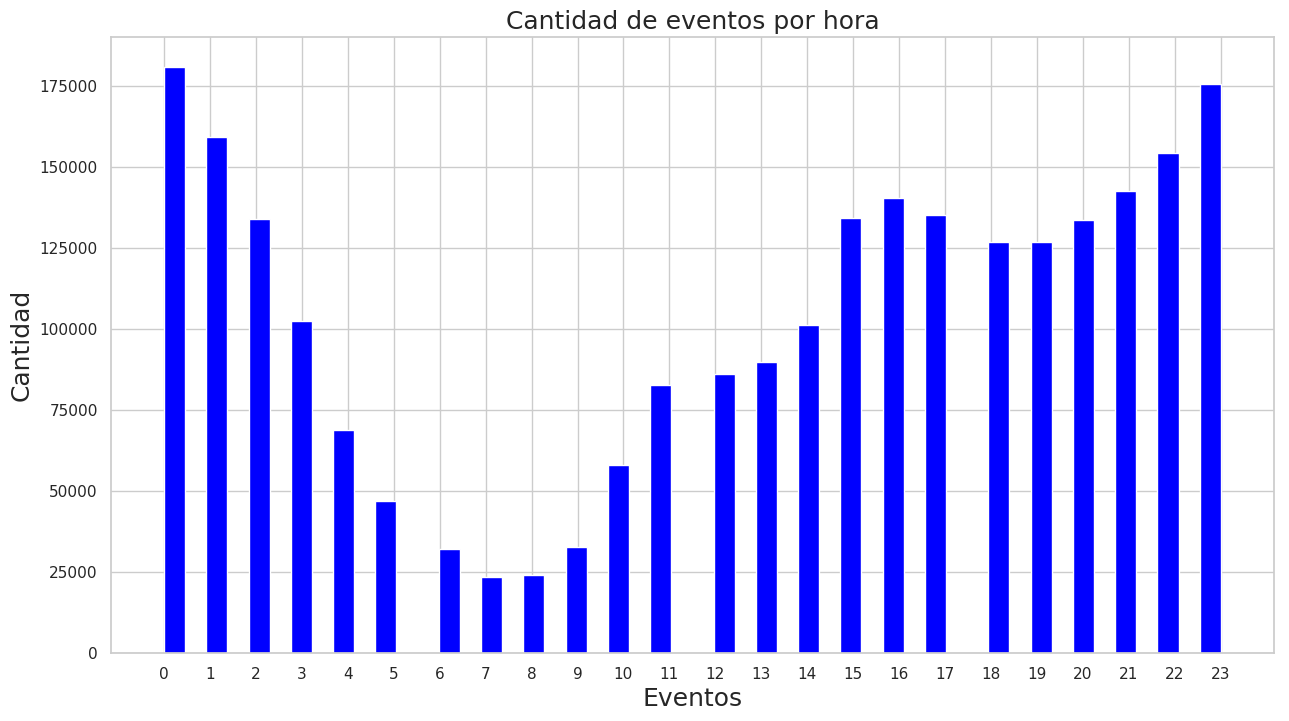

In [45]:
grafico_hora = events['hour'].plot.hist(bins = 50, color = 'blue', figsize = (15,8))
grafico_hora.set_title('Cantidad de eventos por hora', fontsize = 18)
plt.xticks( [n for n in range(0,24,1)])
grafico_hora.set_xlabel('Eventos', fontsize = 18)
grafico_hora.set_ylabel('Cantidad', fontsize = 18)